# Singular Value Decomposition (SVD)

Any rectangular matrix $\boldsymbol A \in \mathbb R^{m\times n}$ has a **singular value decomposition** $\boldsymbol A = \boldsymbol U \boldsymbol \Sigma \boldsymbol V^\intercal$ where

* $\boldsymbol U = [\boldsymbol u_1 \ldots \boldsymbol u_m] \in\mathbb R^{m\times m}$ is an orthogonal matrix;
* $\boldsymbol \Sigma = \begin{pmatrix}
        \boldsymbol \Lambda &  \boldsymbol 0 \\
         \boldsymbol 0 &  \boldsymbol 0
    \end{pmatrix} \in \mathbb R^{m\times n}$;
* $\boldsymbol \Lambda = \mathrm{diag}\{\sigma_1, \ldots, \sigma_r\}$, $r \leqslant \min\{m, n\}$, $\sigma_1 \geqslant \sigma_2 \geqslant \ldots \geqslant \sigma_r > 0$;
* $\boldsymbol V = [\boldsymbol v_1 \ldots \boldsymbol v_n] \in\mathbb R^{n\times n}$ is an orthogonal matrix.

The numbers $\sigma_1, \ldots, \sigma_r$ are called the **singular values** of $\boldsymbol A$.

**Q**. What is the shape of all blocks of the matrix $\boldsymbol \Sigma$?

**Q**. Calculate $\Vert \boldsymbol A \Vert_F$ in terms of its singular values.


## SVD in NumPy

In [2]:
import numpy as np
A = np.arange(6).reshape(2, 3)
A

array([[0, 1, 2],
       [3, 4, 5]])

To find SVD, use [np.linalg.svd](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html):

In [16]:
U, S, V = np.linalg.svd(A)
print("U:")
print(U)
print("Singular values:", S)
print("V:")
print(V)

U:
[[-0.27472113 -0.96152395]
 [-0.96152395  0.27472113]]
Singular values: [7.34846923 1.        ]
V:
[[-0.39254051 -0.56077215 -0.7290038 ]
 [ 0.82416338  0.13736056 -0.54944226]
 [ 0.40824829 -0.81649658  0.40824829]]


Check the decomposition:

In [31]:
Sigma = np.hstack((np.diag(S), np.zeros(shape=(2, 1))))
U @ Sigma @ V

array([[9.6365988e-16, 1.0000000e+00, 2.0000000e+00],
       [3.0000000e+00, 4.0000000e+00, 5.0000000e+00]])

Check that $\Vert A \Vert_F = \Vert S\Vert_2$:

In [33]:
np.linalg.norm(S), np.linalg.norm(A)

(7.416198487095663, 7.416198487095663)

If $\boldsymbol A$ is a positive semidefinite square matrix ($m=n$) then according to the **spectral theorem**

$$
    \boldsymbol A = \boldsymbol Q \boldsymbol \Lambda \boldsymbol Q^\intercal
$$

where $\boldsymbol Q$ is orthogonal, $\boldsymbol \Lambda$ is diagonal with nonnegative elements on the main diagonal. Hence, the spectral decomposition is a special case of SVD.

In [34]:
A = np.array([[3, 2, 1], [2, 3, 2], [1, 2, 3]])
A

array([[3, 2, 1],
       [2, 3, 2],
       [1, 2, 3]])

Spectral decomposition can also be calculated by `np.linalg.svd`:

In [38]:
U, S, V = np.linalg.svd(A)
U, S, V

(array([[-5.41774320e-01,  7.07106781e-01,  4.54401349e-01],
        [-6.42620551e-01,  3.88578059e-16, -7.66184591e-01],
        [-5.41774320e-01, -7.07106781e-01,  4.54401349e-01]]),
 array([6.37228132, 2.        , 0.62771868]),
 array([[-5.41774320e-01, -6.42620551e-01, -5.41774320e-01],
        [ 7.07106781e-01,  5.55111512e-17, -7.07106781e-01],
        [ 4.54401349e-01, -7.66184591e-01,  4.54401349e-01]]))

Here $\boldsymbol U = \boldsymbol V^\intercal$:

In [39]:
np.linalg.norm(U - V.T)

8.563843312570936e-16

## Reduced form of SVD

SVD can be equivalently written in reduced form $\boldsymbol{A} = \boldsymbol U_r \Lambda \boldsymbol V_r^\intercal$ where

$$
    \boldsymbol{U}_r = [\boldsymbol u_1 \ldots \boldsymbol u_r],\quad
    \boldsymbol{V}_r = [\boldsymbol v_1 \ldots \boldsymbol v_r].
$$

Hence, $\boldsymbol{AV}_r = \boldsymbol U_r \Lambda$, or

$$
    [\boldsymbol {Av}_1 \ldots \boldsymbol {Av}_r] = [\sigma_1 \boldsymbol {u}_1 \ldots \sigma_r \boldsymbol {u}_r].
$$

Consequently, $\boldsymbol {Av}_i = \sigma_i \boldsymbol u_i$, $i=1,\ldots, r$. Also,

$$
    \boldsymbol{A} = [\sigma_1 \boldsymbol {u}_1 \ldots \sigma_r \boldsymbol {u}_r] \begin{pmatrix}
    \boldsymbol v_1^\intercal \\
    \vdots \\
    \boldsymbol v_r^\intercal
    \end{pmatrix} = \sum\limits_{i=1}^r \sigma_i \boldsymbol u_i\boldsymbol v_i^\intercal.
$$

**Q**. Find SVD of $\boldsymbol A = \boldsymbol{uv}^\intercal$, $\boldsymbol u \in \mathbb R^m$, $\boldsymbol v \in \mathbb R^n$.

**Q**. Find $\boldsymbol {Av}_j$ and  $\boldsymbol A^\intercal \boldsymbol u_j$, $j=1,\ldots, p$.

```{admonition} Exercise
:class: important
Prove that $\boldsymbol u_i$ are eigenvectors of $\boldsymbol {AA}^\intercal$, whereas
$\boldsymbol v_i$ are eigenvectors of $\boldsymbol A^\intercal \boldsymbol A$. What about eigenvalues? 
```

## Truncated SVD

Let $\boldsymbol A = \boldsymbol U \boldsymbol \Sigma \boldsymbol V^\intercal$ be SVD of $\boldsymbol A$. **Truncated SVD** is 

$$
\widehat{\boldsymbol A}_K = \boldsymbol U_K \boldsymbol \Sigma_K \boldsymbol V_K^\intercal,\quad
\Sigma_K = \mathrm{diag}\{\sigma_1, \ldots, \sigma_K\},\quad 1 \leqslant K \leqslant r.
$$

Note that $\widehat{\boldsymbol A}_K$ has rank $K$ and $\widehat{\boldsymbol A}_K = \boldsymbol A$ if $K=r$. It turns out that $\widehat{\boldsymbol A}_K$ is the best approximation of $\boldsymbol A$ among all matrices of rank $K$:

$$
    \min\limits_{\boldsymbol B} \Vert \boldsymbol A - \boldsymbol B\Vert_F^2 = \Vert \boldsymbol A - \widehat{\boldsymbol A}_K\Vert_F^2 = \sum\limits_{i=K+1}^r \sigma_i^2.
$$

**Q**. Why the last equality is true?

## Image compression

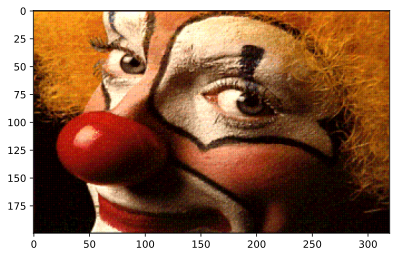

In [47]:
import numpy as np
import matplotlib.pyplot as plt 
import requests
import io
from PIL import Image

%config InlineBackend.figure_format = 'svg'

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

r = requests.get('https://github.com/probml/probml-data/blob/main/data/clown.png?raw=true', stream=True)
img = Image.open(io.BytesIO(r.content))
plt.imshow(img);

In [49]:
X = np.array(img)
rk = np.linalg.matrix_rank(X)
print("Shape:", X.shape)
print("Rank:", rk)

Shape: (200, 320)
Rank: 200


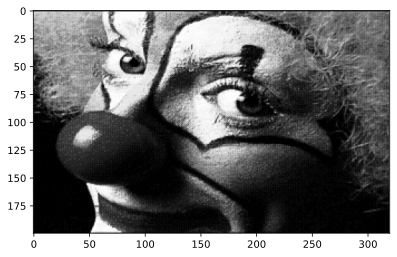

In [51]:
U, sigma, V = np.linalg.svd(X, full_matrices=True)
for r in [1, 2, 5, 10, 20, rk]:
    x_hat = np.dot(np.dot(U[:, :r], np.diag(sigma[:r])), V[:r, :])  
    plt.imshow(x_hat, cmap='gray')